## Introduction

I did this certification on coursera offered by IBM, In which we had to submit a capstone project on segmenting neighborhood of toronto city. In this notebook I am performing similar tasks as in capstone project to demonstrate skills which I gained through that course.

In this notebook I will use Foursquare API service to get nearby venues of zipcodes of Miami city. Then using KMeans clustering model to cluster zipcodes based on venue's data.

## Data Description

In this notebook I using data from three different sources 

1. List of ZIPCODE, I got this list from Miami-Dade County website, you can get this data from [here](https://gis-mdc.opendata.arcgis.com/datasets/fee863cb3da0417fa8b5aaf6b671f8a7_0/data).
2. Latitude and Longitude, I got this coordinates using geopy library.
3. Venues data, I got this data by calling Foursquare API.

### 1. Importing required Libraries

In [1]:
# Libraries for mathematical operations
import pandas as pd
import numpy as np

# Module for extracting Latitude and Longitude
#!pip install geocoder
#!pip install geopy
import geocoder
from geopy.geocoders import Nominatim

# Map rendering library
#!pip install folium
import folium

# Library to handle requests
import requests

# Tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize

# Sklearn module for k-means clustering
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

C:\Users\ketul\anaconda3\envs\TensorflowGPU\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 2. Importing and Extracing Data

In [2]:
temp_df = pd.read_csv("Zip_Code.csv")

In [3]:
temp_df.head()

,OBJECTID,PZIPCODEID,ZIP,ZIPCODE,GlobalID,SHAPE_Length,SHAPE_Area
0,1,33035,33035,33035,{FF9A785D-0F71-4541-9951-9C8D439B42C6},85419.892942,2.917428e+08
1,2,33010,33010,33010,{FF56A32A-B713-4ACF-BA60-E7A24DAADADC},19851.540063,1.317051e+07
2,3,33154,33154,33154,{E0EB98AC-FACD-48B0-8A7E-7E4DFD1AFBF0},15339.770689,1.003669e+07
3,4,33037,33037,33037,{7A7E3954-A67A-4DAC-940F-89D62D9AA090},3500.649627,5.470778e+05
4,5,33116,33116,33116,{8947A873-8AE0-4D30-98A1-E36163E1673C},802.531871,3.025113e+04


Notice our dataset has lot of unwanted columns for this project, we just need column 'ZIPCODE'. So, lets create a new dataframe with just 'ZIPCODE' column.

In [4]:
df = pd.DataFrame(temp_df['ZIPCODE'])

In [5]:
print(df.shape)
df.head()

(88, 1)


,ZIPCODE
0,33035
1,33010
2,33154
3,33037
4,33116


Now, we have the list of zipcodes, lets get Latitudes and Longitudes of this zipcodes. But before getting latitudes and longitudes we have to create a new datafame to store this lat's and long's. So, let's do that.

In [6]:
column_names = ['Latitude','Longitude']
cor = pd.DataFrame(columns = column_names)
cor

,Latitude,Longitude


Using geopy library to get the latitude and longitudes values of miami zipcodes

In [7]:
# get latitude and Longitude
address = df['ZIPCODE']

count = 0
for add in address:
    geolocator = Nominatim(user_agent = "miami-explorer")
    location = geolocator.geocode(add, country_codes = "US")
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinate of Miami are {}, {}.'.format(latitude, longitude))
    count+=1
    print(count)
    cor = cor.append({'Latitude': latitude,
              'Longitude': longitude}, ignore_index = True)

The geograpical coordinate of Miami are 25.45276176711093, -80.44824365538241.
1


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.83208850585861, -80.27786323590128.
2


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.88305982246732, -80.12803563868464.
3


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.138669309430895, -80.40683469707318.
4


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.6713949, -80.3740703.
5


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.5955052, -80.3599341.
6


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.8655287, -80.1931817.
7


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,
C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.6906295, -80.3880968.
8
The geograpical coordinate of Miami are 25.81711746233581, -80.13134693420902.
9


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.841655666666664, -80.18183353333333.
10


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.76006354480287, -80.14301157921147.
11


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.85093935148522, -80.23639344322768.
12


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.7674878, -80.4881149.
13


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.901272311665796, -80.34984409535909.
14


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.443922825593837, -80.49059038307297.
15


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.942428622623684, -80.31969228220768.
16


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.89240092074928, -80.33295997356221.
17


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.73948872341802, -80.30909121262889.
18


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.7208332416205, -80.27180479787627.
19


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.897086119361575, -80.15775682162888.
20


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.499375542857145, -80.3951359.
21


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.832306610924125, -80.36990828430291.
22


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.832004, -80.2097275.
23


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.559916906846276, -80.34720128494453.
24


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.946500935534083, -80.21578127483629.
25


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.7947462, -80.3154102.
26


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.69924094009807, -80.44677666925847.
27


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.776430198098858, -80.2063451904943.
28


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.7689319438, -80.1902374078.
29


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.801176766104703, -80.32107574960071.
30


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.702427311634917, -80.29770784884296.
31


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.78410634635149, -80.18896988211716.
32


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.822864243864665, -80.30490583604956.
33


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.767039344864024, -80.23414719066344.
34


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.73458122932725, -80.35802140254054.
35


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.52582252842679, -80.48986823648754.
36


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.893480963529527, -80.18246183001165.
37


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.92881224387292, -80.17857598505105.
38


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.95943491092459, -80.17895810681968.
39


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.8874708100409, -80.22916774699387.
40


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.65618628932225, -80.36213840453965.
41


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.940609354708393, -80.13411499772404.
42


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.659893210450836, -80.44959086699214.
43


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.857166861378204, -80.13311828390567.
44


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.962893027660872, -80.14442345629764.
45


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.72919374453513, -80.4448335182044.
46


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.946135561181766, -80.24796976931128.
47


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.94474540406196, -80.27741114390706.
48


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.65923890877358, -80.40763302995026.
49


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.9113050880936, -80.24597857643954.
50


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.813893028679107, -80.20557830941613.
51


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.757186120405063, -80.2066564318481.
52


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.813220240616545, -80.23378871586216.
53


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.574539665901597, -80.34498965927708.
54


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.63725306056338, -80.31827470772376.
55


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.767950746612247, -80.20526980469388.
56


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.603072420578947, -80.45421854052631.
57


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.787298467263543, -80.20406624981635.
58


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.817380663413992, -80.18973952582851.
59


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.785092630778138, -80.14162139270495.
60


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.782635261405925, -80.2381952779807.
61


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.75327693958798, -80.23489542369768.
62


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.755548472741822, -80.27007330523648.
63


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.853396683304478, -80.18466728816473.
64


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.73206734345201, -80.24387228509265.
65


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.85104616037711, -80.20617433506065.
66


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.667374624657395, -80.30753510033252.
67


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.692080282677164, -80.16652369139108.
68


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.70233925272221, -80.36076096619922.
69


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.55903333514709, -80.3999185483079.
70


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.865430253432358, -80.30063215321557.
71


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.900063039232034, -80.3071142033349.
72


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.892020226359435, -80.20944639718597.
73


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.70106259286057, -80.4083359762059.
74


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.777019282382938, -80.40461100500696.
75


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.75846528411365, -80.40868241508221.
76


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.76284802795263, -80.35839005658663.
77


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.78480549149865, -80.36248389064643.
78


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.73357946637314, -80.41020017257523.
79


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.478824681484454, -80.48827415929792.
80


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.8605663341423, -80.2709293766426.
81


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.757003390479234, -80.44323721463259.
82


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.596253045431848, -80.40430838841155.
83


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.60638008346267, -80.34886177496023.
84


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.485153095777168, -80.43179171093284.
85


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.53037343473293, -80.39523775887942.
86


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.763162661096274, -80.30917522539706.
87


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


The geograpical coordinate of Miami are 25.776090562056226, -80.29179188480322.
88


C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2586385972.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append({'Latitude': latitude,


In [8]:
cor.head()

,Latitude,Longitude
0,25.452762,-80.448244
1,25.832089,-80.277863
2,25.883060,-80.128036
3,25.138669,-80.406835
4,25.671395,-80.374070


Now, we got lat's and long's. Let's join 'df' and 'corr'

In [9]:
df = df.join(cor, how='outer')

In [10]:
df

,ZIPCODE,Latitude,Longitude
0,33035,25.452762,-80.448244
1,33010,25.832089,-80.277863
2,33154,25.883060,-80.128036
3,33037,25.138669,-80.406835
4,33116,25.671395,-80.374070
...,...,...,...
83,33157,25.606380,-80.348862
84,33033,25.485153,-80.431792
85,33032,25.530373,-80.395238
86,33144,25.763163,-80.309175


Now lets plot this zipcodes on map using there latitude's and longitude's

In [11]:
# create map of New York using latitude and longitude values
map_miami = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, zipcode in zip(df['Latitude'], df['Longitude'], df['ZIPCODE']):
    label = '{}'.format(zipcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat, lng], 
    radius = 5,
    color = 'blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_miami)
    
map_miami

**Folium** is a great visualization library. Feel free to zoom into the above map.

Now, our data is looking good, lets get neverby venues for each zipcode from Foursquare using API.

To get data from Foursquare, we should have Foursquare developer acccount and have credentials.

In [12]:
CLIENT_ID = 'MEEOYI5MLORDKBROGLTY1FQZSC5EGNO5EL4OUZYMHYRB113N' # your Foursquare ID
CLIENT_SECRET = 'JJSBHTXOMX5QPBDS54NGRXB2E5OGFAMRPLRNOONLBHIH22IM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MEEOYI5MLORDKBROGLTY1FQZSC5EGNO5EL4OUZYMHYRB113N
CLIENT_SECRET:JJSBHTXOMX5QPBDS54NGRXB2E5OGFAMRPLRNOONLBHIH22IM


Lets expore the first zip in our dataframe

In [13]:
df.loc[0, 'ZIPCODE'] 

33035

In [14]:
zip_latitude = df.loc[0, 'Latitude'] # zipcode latitude value
zip_longitude = df.loc[0, 'Longitude'] # zipcode longitude value

zip_code = df.loc[0, 'ZIPCODE'] # zipcode value

print('Latitude and longitude values of {} are {}, {}.'.format(zip_code, 
                                                               zip_latitude, 
                                                               zip_longitude))

Latitude and longitude values of 33035 are 25.45276176711093, -80.44824365538241.


Now, lets get the top 100 venues that are in '33035' within a radius of 500 meters

In [15]:
LIMIT = 100

radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    zip_latitude, 
    zip_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=MEEOYI5MLORDKBROGLTY1FQZSC5EGNO5EL4OUZYMHYRB113N&client_secret=JJSBHTXOMX5QPBDS54NGRXB2E5OGFAMRPLRNOONLBHIH22IM&v=20180605&ll=25.45276176711093,-80.44824365538241&radius=500&limit=100'

Our parameters are set lets request API

In [16]:
import requests
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '63cef13274c0ad7b6ca00e76'},
 'response': {'queryRefinements': {'target': {'type': 'path',
    'url': '/venue/explore',
    'params': {'ll': '25.452762,-80.448244', 'radius': '500'}},
   'refinements': [{'query': 'Food'},
    {'query': 'Nightlife'},
    {'query': 'Coffee'},
    {'query': 'Shops'},
    {'query': 'Arts'},
    {'query': 'Outdoors'}]},
  'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Keys Gate',
  'headerFullLocation': 'Keys Gate, Homestead',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 1,
  'suggestedBounds': {'ne': {'lat': 25.457261771610934,
    'lng': -80.44326923528236},
   'sw': {'lat': 25.448261762610922, 'lng': -80.45321807548247}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
      

In [17]:
# function that extracts the category of the venu
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [18]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\3861525911.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Baseline Baseball,Nightlife Spot,25.454335,-80.444341


Now lets get venues for each zipcode and load that data into "miami_venues" dataframe

In [19]:
def getNearbyVenues(zipCode, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for zipCode, lat, lng in zip(zipCode, latitudes, longitudes):
        print(zipCode)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
        except:
            continue
        # return only relevant information for each nearby venue
        venues_list.append([(
            zipCode, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Zipcode', 
                  'Zipcode Latitude', 
                  'Zipcode Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
miami_venues = getNearbyVenues(zipCode=df['ZIPCODE'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

33035
33010
33154
33037
33116
33197
33153
33283
33140
33101
33109
33147
33192
33018
33034
33015
33016
33155
33146
33181
33039
33178
33151
33190
33169
33152
33193
33128
33131
33122
33143
33132
33166
33135
33165
33031
33161
33162
33179
33167
33176
33160
33196
33141
33180
33185
33056
33055
33186
33054
33127
33129
33142
33189
33158
33130
33187
33136
33137
33139
33125
33145
33134
33138
33133
33150
33156
33149
33173
33170
33012
33014
33168
33183
33182
33184
33174
33172
33175
33030
33013
33194
33177
33157
33033
33032
33144
33126


In [21]:
print(miami_venues.shape)
miami_venues.head()

(1068, 7)


,Zipcode,Zipcode Latitude,Zipcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,33035,25.452762,-80.448244,Baseline Baseball,25.454335,-80.444341,Nightlife Spot
1,33010,25.832089,-80.277863,Maruchi Restaurant,25.828682,-80.279864,Fast Food Restaurant
2,33010,25.832089,-80.277863,Sedano's,25.830828,-80.274033,Grocery Store
3,33010,25.832089,-80.277863,Panda Animal Clinic,25.830336,-80.274817,Veterinarian
4,33010,25.832089,-80.277863,Estrella Cubana Restaurant,25.833420,-80.281998,Food


### 3.Explore and Prepare Data 

In [22]:
miami_venues.groupby('Zipcode').count()

,Zipcode Latitude,Zipcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Zipcode,,,,,,
33010,4,4,4,4,4,4
33012,17,17,17,17,17,17
33013,6,6,6,6,6,6
33014,4,4,4,4,4,4
33015,16,16,16,16,16,16
...,...,...,...,...,...,...
33193,18,18,18,18,18,18
33194,4,4,4,4,4,4
33196,3,3,3,3,3,3


In [23]:
print('There are {} uniques categories.'.format(len(miami_venues['Venue Category'].unique())))

There are 212 uniques categories.


In [24]:
# one hot encoding
miami_onehot = pd.get_dummies(miami_venues[['Venue Category']], prefix='', prefix_sep="")

# add zipcode column back to dataframe
miami_onehot['Zipcode'] = miami_venues['Zipcode']

# move zipcode column to the first column
fixed_columns = [miami_onehot.columns[-1]] + list(miami_onehot.columns[:-1])
miami_onehot = miami_onehot[fixed_columns]

miami_onehot.head()

,Zipcode,ATM,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Weight Loss Center,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,33035,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,33010,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,33010,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,33010,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,33010,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
miami_onehot.shape

(1068, 213)

In [26]:
miami_grouped = miami_onehot.groupby('Zipcode').mean().reset_index()
miami_grouped

,Zipcode,ATM,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Weight Loss Center,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,33010,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.25,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,33012,0.0,0.117647,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.00,0.058824,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,33013,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,33014,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,33015,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.00,0.000000,0.062500,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,33193,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.00,0.000000,0.055556,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
81,33194,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
82,33196,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
83,33197,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,...,0.00,0.000000,0.055556,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [27]:
miami_grouped.shape

(85, 213)

Let's find out frequencies of top five venues in each zipcode

In [28]:
num_top_venues = 5

for hood in miami_grouped['Zipcode']:
    print("----"+str(hood)+"----")
    temp = miami_grouped[miami_grouped['Zipcode'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----33010----
                  venue  freq
0         Grocery Store  0.25
1  Fast Food Restaurant  0.25
2          Veterinarian  0.25
3                  Food  0.25
4           Pizza Place  0.00


----33012----
                  venue  freq
0  Fast Food Restaurant  0.18
1   American Restaurant  0.12
2     Mobile Phone Shop  0.12
3    Mexican Restaurant  0.06
4        Breakfast Spot  0.06


----33013----
                  venue  freq
0      Cuban Restaurant  0.50
1           Pizza Place  0.17
2  Fast Food Restaurant  0.17
3                  Café  0.17
4                   ATM  0.00


----33014----
            venue  freq
0            Bank  0.25
1     Pizza Place  0.25
2          Bakery  0.25
3  Baseball Field  0.25
4     Planetarium  0.00


----33015----
                  venue  freq
0  Gym / Fitness Center  0.12
1  Fast Food Restaurant  0.06
2            Food Truck  0.06
3        Breakfast Spot  0.06
4             Pet Store  0.06


----33016----
                        venue  freq
0     

                 venue  freq
0  Peruvian Restaurant  0.09
1   Italian Restaurant  0.09
2               Bakery  0.09
3           Restaurant  0.04
4          Pizza Place  0.04


----33150----
                  venue  freq
0        Rental Service  0.17
1   Rental Car Location  0.17
2  Fast Food Restaurant  0.17
3         Fishing Store  0.17
4          Intersection  0.17


----33151----
                venue  freq
0         Wings Joint  0.15
1      Discount Store  0.08
2    Video Game Store  0.08
3  Chinese Restaurant  0.08
4            Pharmacy  0.08


----33152----
                  venue  freq
0            Restaurant  0.25
1                  Bank  0.12
2  Fast Food Restaurant  0.12
3        Sandwich Place  0.12
4  Gym / Fitness Center  0.12


----33153----
          venue  freq
0       Theater  0.09
1          Bank  0.09
2   Pizza Place  0.05
3   Coffee Shop  0.05
4  Optical Shop  0.05


----33154----
                 venue  freq
0        Grocery Store  0.18
1     Asian Restaurant  0.09

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Zipcode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
zipCode_venues_sorted = pd.DataFrame(columns=columns)
zipCode_venues_sorted['Zipcode'] = miami_grouped['Zipcode']

for ind in np.arange(miami_grouped.shape[0]):
    zipCode_venues_sorted.iloc[ind, 1:] = return_most_common_venues(miami_grouped.iloc[ind, :], num_top_venues)

zipCode_venues_sorted.head()

,Zipcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,33010,Grocery Store,Fast Food Restaurant,Veterinarian,Food,Pizza Place,Outdoor Sculpture,Outlet Store,Paper / Office Supplies Store,Park,Performing Arts Venue
1,33012,Fast Food Restaurant,American Restaurant,Mobile Phone Shop,Mexican Restaurant,Breakfast Spot,Smoothie Shop,Cosmetics Shop,Clothing Store,Bank,Miscellaneous Shop
2,33013,Cuban Restaurant,Pizza Place,Fast Food Restaurant,Café,ATM,Outlet Store,Paper / Office Supplies Store,Park,Performing Arts Venue,Perfume Shop
3,33014,Bank,Pizza Place,Bakery,Baseball Field,Planetarium,Outdoor Sculpture,Outlet Store,Paper / Office Supplies Store,Park,Performing Arts Venue
4,33015,Gym / Fitness Center,Fast Food Restaurant,Food Truck,Breakfast Spot,Pet Store,South American Restaurant,Coffee Shop,Pizza Place,Convenience Store,Italian Restaurant


### Building KMeans Model

In [31]:
from sklearn.cluster import KMeans

In [71]:
distortions = []
miami_grouped_clustering = miami_grouped.drop('Zipcode', 1)
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(miami_grouped_clustering)
    distortions.append(kmeanModel.inertia_)

C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\2796898289.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  miami_grouped_clustering = miami_grouped.drop('Zipcode', 1)
C:\Users\ketul\anaconda3\envs\TensorflowGPU\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ketul\anaconda3\envs\TensorflowGPU\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ketul\anaconda3\envs\TensorflowGPU\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known t

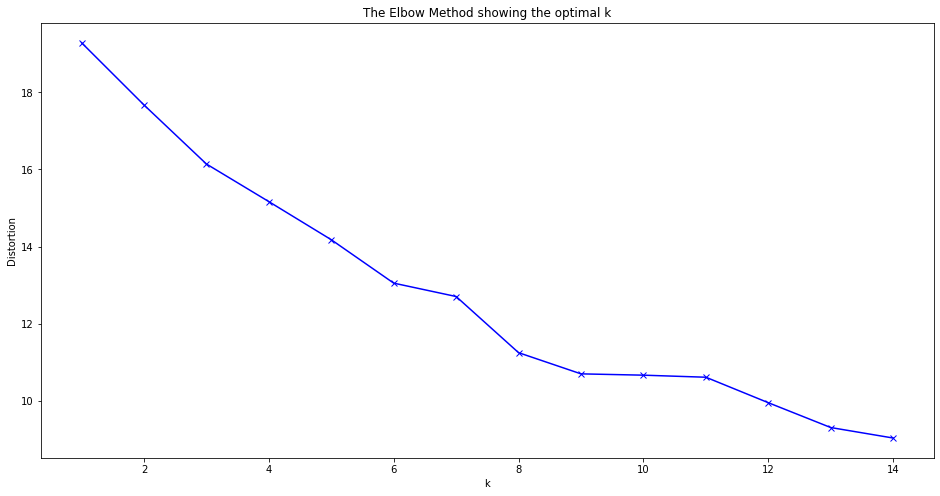

In [72]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Through elbow method we can see '7' is the best value for number of cluster

In [73]:
# set number of clusters
kclusters = 10

miami_grouped_clustering = miami_grouped.drop('Zipcode', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(miami_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

C:\Users\ketul\AppData\Local\Temp\ipykernel_14836\3336868902.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  miami_grouped_clustering = miami_grouped.drop('Zipcode', 1)
C:\Users\ketul\anaconda3\envs\TensorflowGPU\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([3, 3, 5, 3, 3, 1, 3, 4, 2, 4])

In [74]:
# add clustering labels
zipCode_venues_sorted['Cluster Labels'] = kmeans.labels_

miami_merged = df

miami_merged = miami_merged.join(zipCode_venues_sorted.set_index('Zipcode'), on='ZIPCODE')

miami_merged.head() # check the last columns!

,ZIPCODE,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,33035,25.452762,-80.448244,Nightlife Spot,Optical Shop,Other Repair Shop,Outdoor Sculpture,Outlet Store,Paper / Office Supplies Store,Park,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,8.0
1,33010,25.832089,-80.277863,Grocery Store,Fast Food Restaurant,Veterinarian,Food,Pizza Place,Outdoor Sculpture,Outlet Store,Paper / Office Supplies Store,Park,Performing Arts Venue,3.0
2,33154,25.883060,-80.128036,Grocery Store,Asian Restaurant,Park,Home Service,Peruvian Restaurant,Hotel,Pet Service,Jewelry Store,Harbor / Marina,Kosher Restaurant,3.0
3,33037,25.138669,-80.406835,Storage Facility,Juice Bar,Seafood Restaurant,Plaza,Italian Restaurant,Japanese Restaurant,Smoke Shop,Campground,American Restaurant,Park,3.0
4,33116,25.671395,-80.374070,Sandwich Place,Gym / Fitness Center,Cosmetics Shop,Gas Station,Park,Hookah Bar,American Restaurant,Caribbean Restaurant,Café,Italian Restaurant,3.0


In [75]:
miami_merged.tail()

,ZIPCODE,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
83,33157,25.606380,-80.348862,Dog Run,Seafood Restaurant,Pizza Place,Other Repair Shop,Convenience Store,Auto Dealership,Bank,Rental Car Location,Print Shop,Pharmacy,3.0
84,33033,25.485153,-80.431792,Cuban Restaurant,ATM,Pizza Place,Outdoor Sculpture,Outlet Store,Paper / Office Supplies Store,Park,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,5.0
85,33032,25.530373,-80.395238,Home Service,Speakeasy,Construction & Landscaping,ATM,Pharmacy,Outdoor Sculpture,Outlet Store,Paper / Office Supplies Store,Park,Performing Arts Venue,4.0
86,33144,25.763163,-80.309175,Fast Food Restaurant,Discount Store,Pharmacy,Bakery,Donut Shop,Sandwich Place,Food,Cosmetics Shop,Seafood Restaurant,Fried Chicken Joint,3.0
87,33126,25.776091,-80.291792,Fast Food Restaurant,Italian Restaurant,Pharmacy,Salad Place,Sandwich Place,Department Store,Cuban Restaurant,Shipping Store,Shop & Service,Smoothie Shop,3.0


In [76]:
miami_merged.shape

(88, 14)

In [77]:
miami_merged.isnull().sum()

ZIPCODE                   0
Latitude                  0
Longitude                 0
1st Most Common Venue     3
2nd Most Common Venue     3
3rd Most Common Venue     3
4th Most Common Venue     3
5th Most Common Venue     3
6th Most Common Venue     3
7th Most Common Venue     3
8th Most Common Venue     3
9th Most Common Venue     3
10th Most Common Venue    3
Cluster Labels            3
dtype: int64

In [78]:
miami_merged = miami_merged.dropna(axis = 0)

In [79]:
miami_merged['10th Most Common Venue'].isnull().sum().sum()

0

In [80]:
miami_merged.shape

(85, 14)

In [81]:
miami_merged['Cluster Labels'] = miami_merged['Cluster Labels'].astype(int)

In [82]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [83]:
miami_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 87
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ZIPCODE                 85 non-null     int64  
 1   Latitude                85 non-null     float64
 2   Longitude               85 non-null     float64
 3   1st Most Common Venue   85 non-null     object 
 4   2nd Most Common Venue   85 non-null     object 
 5   3rd Most Common Venue   85 non-null     object 
 6   4th Most Common Venue   85 non-null     object 
 7   5th Most Common Venue   85 non-null     object 
 8   6th Most Common Venue   85 non-null     object 
 9   7th Most Common Venue   85 non-null     object 
 10  8th Most Common Venue   85 non-null     object 
 11  9th Most Common Venue   85 non-null     object 
 12  10th Most Common Venue  85 non-null     object 
 13  Cluster Labels          85 non-null     int32  
dtypes: float64(2), int32(1), int64(1), object(10

In [84]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(miami_merged['Latitude'], miami_merged['Longitude'], miami_merged['ZIPCODE'], miami_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters